In [239]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns



In [240]:
data = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv")
data

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [241]:
df = data[(data['value'] > data['value'].quantile(0.025)) & (data['value'] < data['value'].quantile(0.975))]

df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [242]:
df['date'] = pd.to_datetime(df['date'])



df_month

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25012\2873861302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,value
date,
2016-05,97162
2016-06,415627
2016-07,675071
2016-08,962525
2016-09,1244306
2016-10,849348
2016-11,1213459
2016-12,862805
2017-01,1016340


In [243]:
df['year'] = df['date'].dt.strftime('%Y')
df['month'] = df['date'].dt.strftime('%B')

df

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25012\1743536773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.strftime('%Y')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25012\1743536773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.strftime('%B')


,date,value,year,month
10,2016-05-19,19736,2016,May
17,2016-05-26,18060,2016,May
18,2016-05-27,19997,2016,May
19,2016-05-28,19044,2016,May
20,2016-05-29,20325,2016,May
...,...,...,...,...
1294,2019-11-24,138875,2019,November
1299,2019-11-29,171584,2019,November
1300,2019-11-30,141161,2019,November
1301,2019-12-01,142918,2019,December


In [244]:
df.set_index(['year', 'month'])

date   value
year month                      
2016 May      2016-05-19   19736
     May      2016-05-26   18060
     May      2016-05-27   19997
     May      2016-05-28   19044
     May      2016-05-29   20325
...                  ...     ...
2019 November 2019-11-24  138875
     November 2019-11-29  171584
     November 2019-11-30  141161
     December 2019-12-01  142918
     December 2019-12-03  158549

[1238 rows x 2 columns]

In [245]:
df.groupby('year').sum()
df

,date,value,year,month
10,2016-05-19,19736,2016,May
17,2016-05-26,18060,2016,May
18,2016-05-27,19997,2016,May
19,2016-05-28,19044,2016,May
20,2016-05-29,20325,2016,May
...,...,...,...,...
1294,2019-11-24,138875,2019,November
1299,2019-11-29,171584,2019,November
1300,2019-11-30,141161,2019,November
1301,2019-12-01,142918,2019,December


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 10 to 1303
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
 2   year    1238 non-null   object        
 3   month   1238 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 48.4+ KB


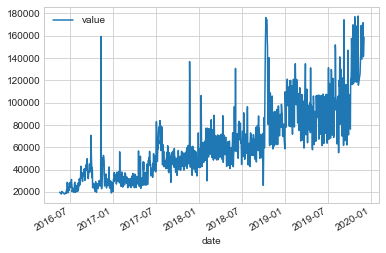

In [247]:
plt.style.use('seaborn-whitegrid')

df.plot.line(x = 'date', y = 'value')
plt.grid('on')

Text(0.5, 1.0, 'Months')

<Figure size 2160x1080 with 0 Axes>

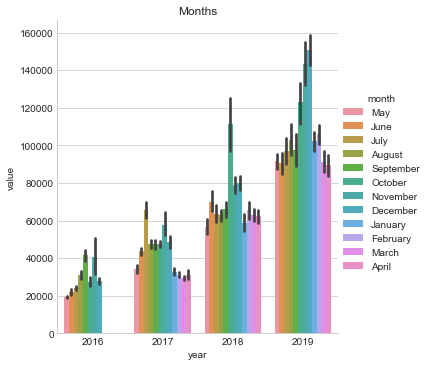

In [248]:
fig_ = plt.figure(figsize=(30,15))

sns.catplot(x="year", y="value", hue="month", data=df, kind="bar")
plt.title('Months')


Text(0.5, 1.0, 'Year-Wise box plot (Trend)')

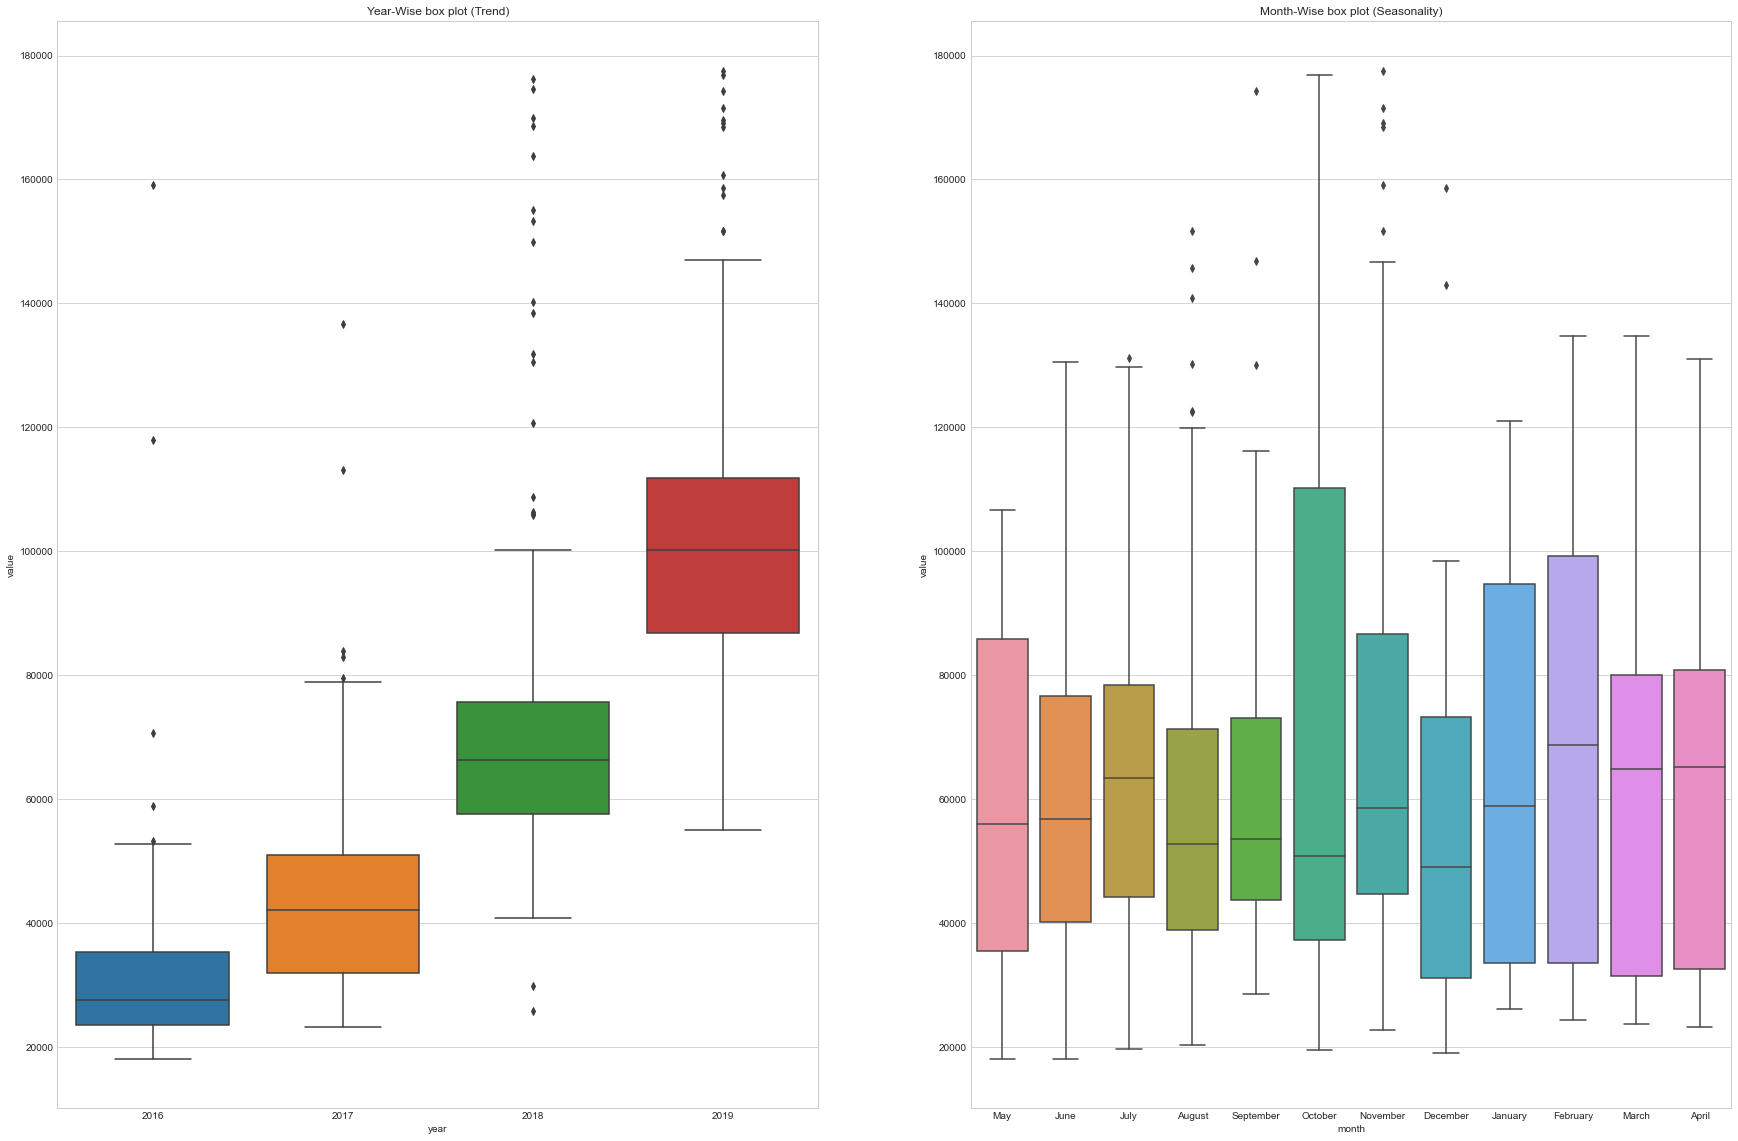

In [249]:
fig = plt.figure(figsize=(30,20))
a = plt.subplot(1,2,2)
sns.boxplot(x = 'month', y = 'value', data = df)
plt.title('Month-Wise box plot (Seasonality)')
b = plt.subplot(1,2,1)
sns.boxplot(x = 'year', y = 'value', data = df)

plt.title('Year-Wise box plot (Trend)')